In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
from collections import Counter
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
import helper_functions as hp
import seaborn as sns
import pickle
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras import backend as K
# import helper functions
import sys
# add our pipeline folder to the path to import functions
sys.path.insert(1, '../2_model_pipeline')
from model_helper import *
%matplotlib inline

# Load model

In [12]:
model = tf.keras.models.load_model('Saved_models/model1_sample_size500_epoch3_dense2_losswbc.h5', custom_objects={'weighted_bce': weighted_bce, 'accuracy_on_zero': accuracy_on_zero, 'accuracy_on_one': accuracy_on_one})


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               12845568  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 119)               6

In [16]:
number_of_images = 500
EPOCHS = 3

In [17]:
# Test train split, plus the features that are used to binarize the data
X_train, X_val, y_train_bin, y_val_bin, features = train_test_split_custom(number_of_images)

In [18]:
train_ds = create_dataset(X_train, y_train_bin)
val_ds = create_dataset(X_val, y_val_bin)

In [19]:
%%time
# Takes 2:30 with 1000 images, 
# grab the predictions from the valadation ds
predictions_test = model.predict(val_ds)
predictions_train = model.predict(train_ds)

CPU times: user 4min 57s, sys: 14.3 s, total: 5min 11s
Wall time: 2min 37s


# ROC AUC curve

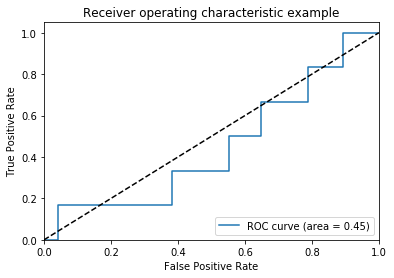

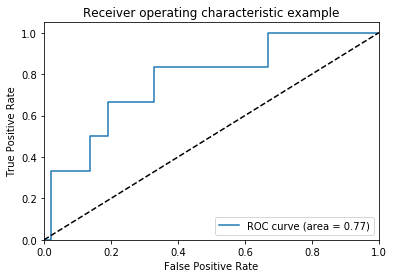

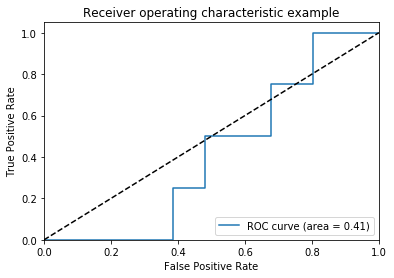

In [35]:
from sklearn.metrics import roc_curve, auc

n_classes = y_val_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

    
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], predictions_test[:, i], pos_label=1)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [38]:
predictions_test

array([[0.5400171 , 0.39153355, 0.5009493 , ..., 0.5388045 , 0.5268598 ,
        0.7511846 ],
       [0.5255103 , 0.45821244, 0.36597943, ..., 0.49973938, 0.5559322 ,
        0.7477586 ],
       [0.59355503, 0.27699614, 0.5096899 , ..., 0.58080137, 0.6001558 ,
        0.78871465],
       ...,
       [0.571264  , 0.4105184 , 0.4673998 , ..., 0.5092367 , 0.4970053 ,
        0.74321735],
       [0.6783322 , 0.25014228, 0.59321004, ..., 0.5167468 , 0.5433899 ,
        0.7469443 ],
       [0.6170332 , 0.3150941 , 0.53148675, ..., 0.53379965, 0.60675454,
        0.7662505 ]], dtype=float32)

In [66]:
best=np.where(features=='produktbeschreibungextern-False')[0][0]
best

80

In [67]:
nr2=np.where(features=='bleichen-0')[0][0]
nr2

23

# ROC AUC for the BEST feature

In [62]:
def ROC_AUC_per_feature(i):

    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], predictions_test[:, i], pos_label=1)
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()

    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

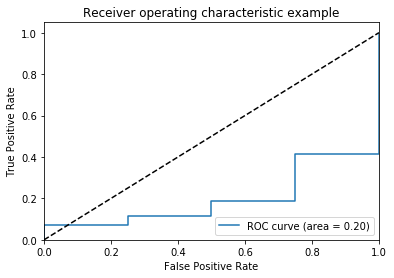

In [63]:
ROC_AUC_per_feature(best)

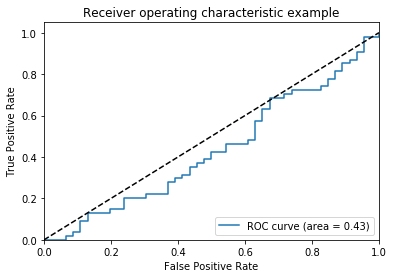

In [68]:
ROC_AUC_per_feature(23)

# ROC AUC scores over all the features

In [75]:
for i in range(119):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], predictions_test[:, i], pos_label=1)
    roc_auc[i] = auc(fpr[i], tpr[i])

In [77]:
roc_auc

{0: 0.44858156028368795,
 1: 0.7712765957446809,
 2: 0.4140625,
 80: 0.19791666666666669,
 23: 0.43317230273752017,
 3: 0.4422348484848485,
 4: 0.4921875,
 5: 0.3535353535353535,
 6: 0.27083333333333337,
 7: 0.5357142857142857,
 8: 0.4285714285714286,
 9: 0.47894469812278034,
 10: 0.39583333333333337,
 11: 0.48581560283687947,
 12: nan,
 13: 0.58875,
 14: 0.0,
 15: 0.2712765957446808,
 16: 0.15789473684210525,
 17: 0.46236559139784944,
 18: 0.7216494845360825,
 19: 0.4642857142857143,
 20: 0.6556776556776557,
 21: 0.6735395189003436,
 22: 0.5755208333333333,
 24: 0.5831578947368421,
 25: 0.40248226950354615,
 26: 0.4719004719004719,
 27: 0.3943452380952381,
 28: 0.4237588652482269,
 29: 0.5316455696202532,
 30: 0.5344444444444445,
 31: 0.4538690476190476,
 32: 0.5042735042735043,
 33: 0.4973958333333333,
 34: 0.4525490196078431,
 35: 0.3418803418803419,
 36: 0.5549645390070922,
 37: 0.07653061224489799,
 38: 0.41628264208909377,
 39: 0.4470046082949308,
 40: 0.6439393939393939,
 41: na

### Feature with the highest ROC AUC score

In [80]:
max(roc_auc, key=roc_auc.get)

50

In [81]:
features[50]

'material-CAC'

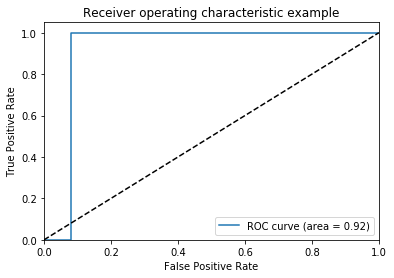

In [84]:
ROC_AUC_per_feature(50)


### All ROC AUC

In [88]:
from sklearn.metrics import roc_curve, auc
#...
for xi, yi in (val_ds, y_val_bin):
    y_pred = model.predict([xi])[0]
    fpr, tpr, _ = roc_curve(y_val_bin, y_pred)

    plt.plot(fpr, tpr, color='darkorange', lw=0.5)

ValueError: too many values to unpack (expected 2)

## Show the difference in the predicitons 

In [ ]:
def plot_per_feature_error(predictions, actual, features):
    
    """return plot of boxplot of predictions when the feature is active"""
    
    only_ones = np.array([np.where(y_true == 1, pred, np.nan) for y_true, pred in zip(actual,
                                                                              predictions)])
    
    only_zeros = np.array([np.where(y_true == 0, pred, np.nan) for y_true, pred in zip(actual,
                                                                              predictions)])

    pred_df = pd.DataFrame(only_ones)
    
    # Name the classes 
    pred_df.columns = features

    # order the whole dataframe and return the column names
    order = pred_df.median().sort_values().keys()
    fig_dims = (16,10)
    fig, ax = plt.subplots(figsize=fig_dims)
    
    sns.boxplot(x='variable', y='value', data=pred_df.melt(), whis=0, showfliers=False, order=order)
    
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

    
    return fig, ax

In [156]:
only_ones = np.array([np.where(y_true == 1, pred, np.nan) for y_true, pred in zip(y_val_bin,
                                                                              predictions_test)])
    
only_zeros = np.array([np.where(y_true == 0, pred, np.nan) for y_true, pred in zip(y_val_bin,
                                                                              predictions_test)])
pred_df = pd.DataFrame(only_ones)
pred_df2 = pd.DataFrame(only_zeros)

# Name the classes 
pred_df.columns = features
pred_df2.columns = features




In [157]:
median_ones=pred_df.median()
median_ones

absatzart-blockabsatz                0.614499
absatzart-flach                      0.412557
anlass-business                      0.483523
anlass-casual                        0.608733
anlass-freizeit                      0.325430
                                       ...   
webart-gewebemitflacheroptik         0.528121
webart-popelinegewebeflacheroptik    0.460878
webart-strick                        0.529540
weiss                                0.538943
winter                               0.751277
Length: 119, dtype: float32

In [158]:

median_zeros=pred_df2.median()

In [164]:
median_zeros

absatzart-blockabsatz                0.626115
absatzart-flach                      0.337856
anlass-business                      0.494790
anlass-casual                        0.624322
anlass-freizeit                      0.326526
                                       ...   
webart-gewebemitflacheroptik         0.469194
webart-popelinegewebeflacheroptik    0.462878
webart-strick                        0.529570
weiss                                0.545569
winter                               0.746198
Length: 119, dtype: float32

In [165]:
diff=median_ones-median_zeros

In [166]:
diff=pd.DataFrame(diff)
#diff.columns=['Difference of medians of pred on 1 and 0']

In [167]:
diff

,0
absatzart-blockabsatz,-0.011615
absatzart-flach,0.074701
anlass-business,-0.011267
anlass-casual,-0.015589
anlass-freizeit,-0.001096
...,...
webart-gewebemitflacheroptik,0.058927
webart-popelinegewebeflacheroptik,-0.002000
webart-strick,-0.000030
weiss,-0.006626


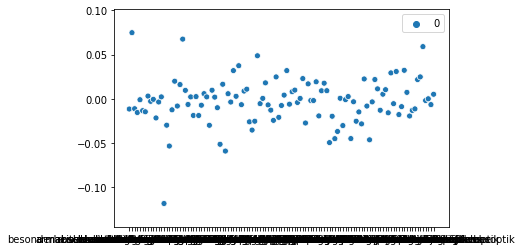

In [169]:
sns.scatterplot(data=diff)


(<Figure size 1152x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6eef3397d0>)

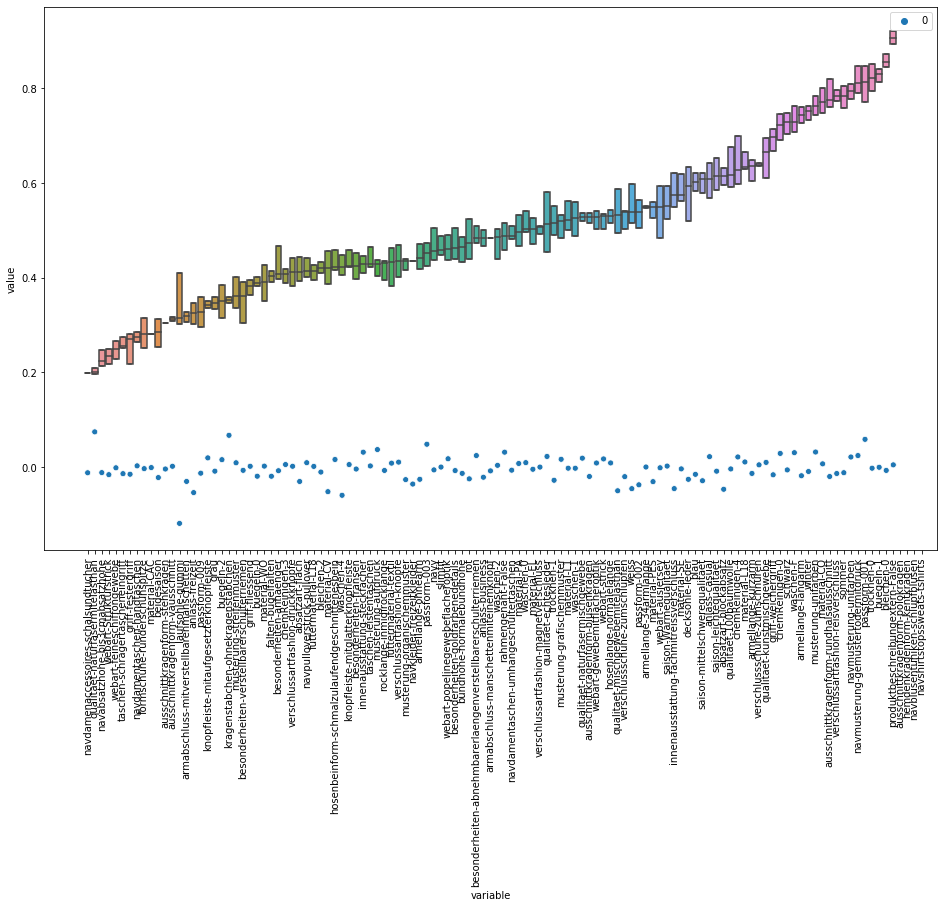

In [170]:
# order the whole dataframe and return the column names
order = pred_df.median().sort_values().keys()
fig_dims = (16,10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.boxplot(x='variable', y='value', data=pred_df.melt(), whis=0, showfliers=False, order=order)


sns.scatterplot(data=diff, ax=ax)

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

fig, ax


In [182]:
def plot_per_feature_error(predictions, actual, features, diff=False):
    
    """return plot of boxplot of predictions when the feature is active"""
    
    only_ones = np.array([np.where(y_true == 1, pred, np.nan) for y_true, pred in zip(actual,
                                                                                  predictions)])
    pred_df = pd.DataFrame(only_ones)
    
    # Name the classes 
    pred_df.columns = features

    # order the whole dataframe and return the column names
    order = pred_df.median().sort_values().keys()
    fig_dims = (16,10)
    fig, ax = plt.subplots(figsize=fig_dims)
    
    sns.boxplot(x='variable', y='value', data=pred_df.melt(), whis=0, showfliers=False, order=order)
    
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    
    if diff:
        only_zeros = np.array([np.where(y_true == 0, pred, np.nan) for y_true, pred in zip(actual,
                                                                                  predictions)])
        pred_df2 = pd.DataFrame(only_zeros)
        pred_df2.columns = features
        median_ones=pred_df.median()
        median_zeros=pred_df2.median()
        diff=median_ones-median_zeros
        diff=pd.DataFrame(diff)

        sns.scatterplot(data=diff, ax=ax)

    return fig, ax

(<Figure size 1152x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6eecc9af90>)

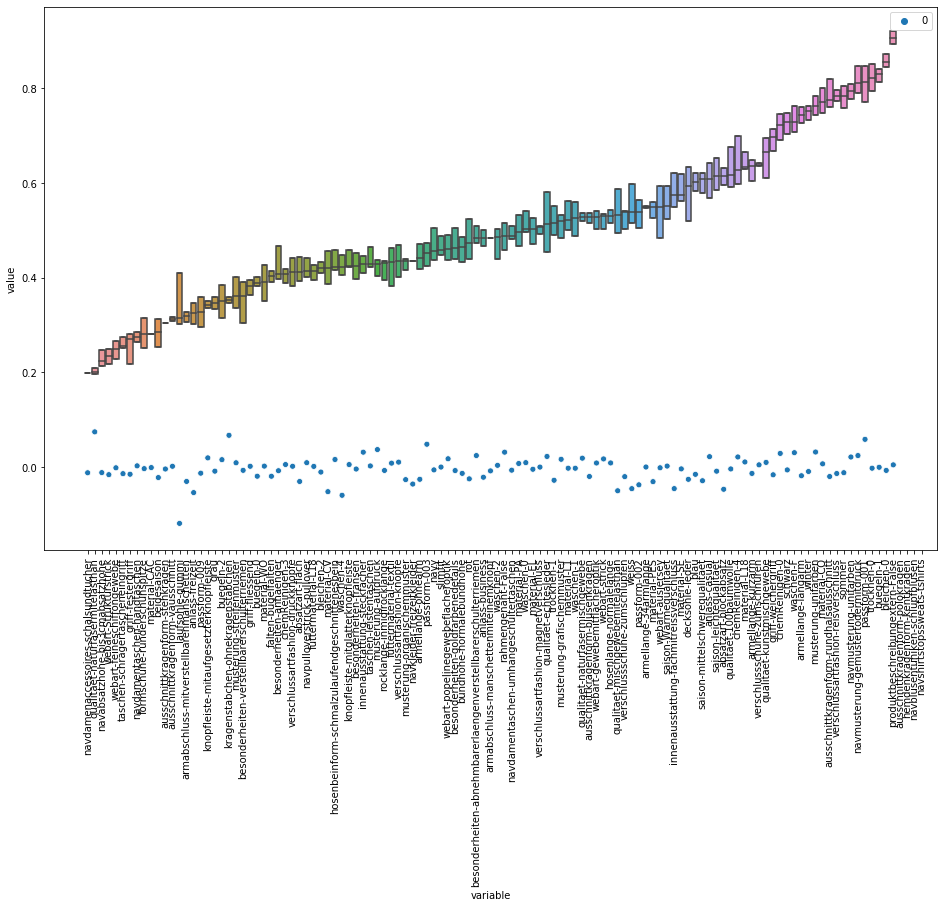

In [183]:
plot_per_feature_error(predictions_test, y_val_bin, features)

# Good predictions

fpr: [0. 0. 1.] 
tpr: [0. 1. 1.]


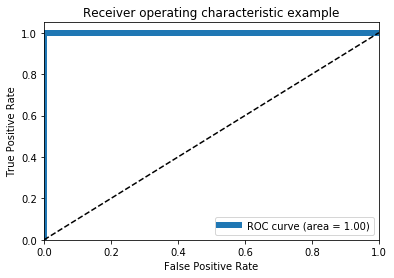

In [589]:
# The roc curve is perfect when the predictions match the target

target = [1,1,1,0,0,0]
preds = np.array([.6,.6,.6,.2,.2,.2])
threshhold = .2
preds_bin = np.array(preds>threshhold).astype('int')
fpr, tpr, _ = roc_curve(target, preds)


print('fpr:',fpr,'\ntpr:',tpr)

# 
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, lw=6)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Bad predictions
The roc curve is terrible when the predictions don't match the target, AUC=0 because no TP are gained wh

fpr: [0. 1. 1.] 
tpr: [0. 0. 1.]


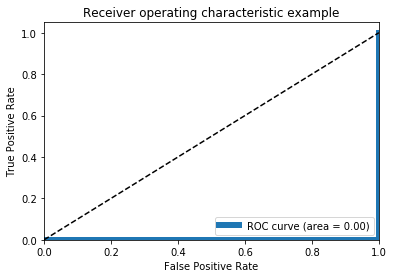

In [590]:
# The roc curve is terrible when the predictions don't match the target
target = [1,1,1,0,0,0]
preds = np.array([.2,.2,.2,.6,.6,.6])
threshhold = .2
preds_bin = np.array(preds>threshhold).astype('int')
fpr, tpr, _ = roc_curve(target, preds)


print('fpr:',fpr,'\ntpr:',tpr)

# 
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, lw=6)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# multilabel scenario 
Now let's create a scenario one bad features and many good features and see how that affects the micro and macro averaged roc curve. The Micro treats the test set as a single image with (number of images x features) number of features so can mask individual features poor performance

In [628]:
def grouped_roc(y_val, y_pred):
    """
    The macro average finds the ROC of every feature and then averages all the lines
    the micro roc flattens all the y_val and y_preds and makes one 
    ROC curve as if it was one image with x number of features
    """

    print(y_val)
    print(y_pred)
    n_classes = y_val.shape[1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_pred[:, i], pos_label=1)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_val.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute the macro-average ROC curve and ROC area
    
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points and sum them all together
    mean_tpr = np.zeros_like(all_fpr)

    for i in range(n_classes):
        if not np.isnan(np.interp(all_fpr, fpr[i], tpr[i])).any():
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


    # plots
    lw = 2
    fig, ax = plt.subplots()
    ax.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)
    ax.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    
    return fig, ax

let's try 10 images with 1 features that is close to perfectly bas and 9 features that are close to perfect

# Example of how ROC behaves with one feature that is quite bad

[[1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [0 0 0 1 1 1]]
[[0.80748378 0.82985688 0.81034185 0.2204789  0.20214046 0.78331355]
 [0.75834341 0.75753069 0.72563412 0.1739546  0.20534178 0.84296549]
 [0.72990129 0.78403327 0.74736916 0.30163101 0.19766499 0.77722739]
 [0.75773718 0.80599593 0.76848885 0.17466189 0.23491086 0.72177154]
 [0.85494375 0.75018306 0.80641693 0.19552041 0.31481053 0.78464081]
 [0.8361675  0.75406388 0.79905156 0.18697833 0.140813   0.75331154]
 [0.85992154 0.78065842 0.7457444  0.21150513 0.18104208 0.76249358]
 [0.80171147 0.84120655 0.82678193 0.20252795 0.17099723 0.79156127]
 [0.76212322 0.82811831 0.85699694 0.17088197 0.13418509 0.80971092]
 [0.22105236 0.16782458 0.20326129 0.88553726 0.86438825 0.1182828 ]]


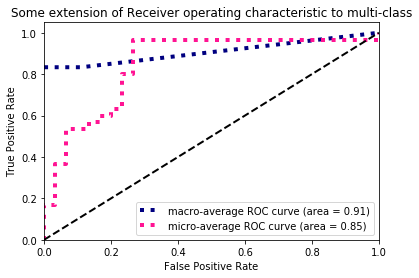

In [685]:
# ROC with 5 good features and one bad feature in all cases

# make the target, which will be 10 'images' with 6 features, 

target = np.tile(np.array([1,1,1,0,0,0]),(9,1))
flipped = np.array([0,0,0,1,1,1]).reshape(1,-1)
target_positive_class=np.concatenate((target,flipped),axis=0)


# make the preds so that one feature is terrible and all the rest are nearly perfect
pred = np.array([.8,.8,.8,.2,.2,.8])
pred_matrix = np.tile(pred,(9,1))
flipped_p =  np.array([.2,.2,.2,.8,.8,.1]).reshape(1,-1)
preds_uniform = np.concatenate((pred_matrix,flipped_p),axis=0)
# Make the preds random
preds_uniform_rand = preds_uniform+np.random.normal(0,.05,10*6).reshape(10,6)


grouped_roc(target_positive_class, preds_uniform_rand)
None

[[1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [0 0 0 1 1 1]]
[[0.75722975 0.73143819 0.81884437 0.10526188 0.27200037 0.95      ]
 [0.84203078 0.89994543 0.76548083 0.26682089 0.21035567 0.7267183 ]
 [0.76926033 0.86368254 0.82359573 0.24440734 0.19702372 0.85197019]
 [0.85717725 0.78806185 0.75344502 0.15811698 0.15116599 0.76075874]
 [0.76181979 0.83247889 0.78112518 0.21048891 0.14269153 0.8187581 ]
 [0.84533576 0.8166123  0.83709117 0.19012683 0.23157685 0.81411548]
 [0.83205089 0.82728014 0.77164771 0.16727954 0.12236355 0.83144669]
 [0.83011589 0.84080492 0.80902363 0.22593861 0.22756951 0.79732091]
 [0.90745371 0.70623289 0.85941558 0.15474972 0.14135153 0.6822761 ]
 [0.18593488 0.16454293 0.23775536 0.80180325 0.77614647 0.76769698]]


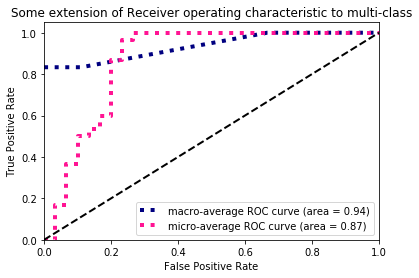

In [687]:
# ROC with 5 good features and one bad feature misses when feature is off

# make the target, which will be 10 'images' with 6 features, 

target = np.tile(np.array([1,1,1,0,0,0]),(9,1))
flipped = np.array([0,0,0,1,1,1]).reshape(1,-1)
target_positive_class=np.concatenate((target,flipped),axis=0)


# make the preds so that one feature is terrible and all the rest are nearly perfect
pred = np.array([.8,.8,.8,.2,.2,.8])
pred_matrix = np.tile(pred,(9,1))
flipped_p =  np.array([.2,.2,.2,.8,.8,.8]).reshape(1,-1)
preds_uniform = np.concatenate((pred_matrix,flipped_p),axis=0)
# Make the preds random
preds_uniform_rand = preds_uniform+np.random.normal(0,.05,10*6).reshape(10,6)

preds_uniform_rand[0,5]=.95

grouped_roc(target_positive_class, preds_uniform_rand)
None

[[1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [0 0 0 1 1 1]]
[[0.88799383 0.82591209 0.78217253 0.14238255 0.20465847 0.21378434]
 [0.79478676 0.87177323 0.87562113 0.24943358 0.19506771 0.2059942 ]
 [0.76857236 0.78990363 0.91273305 0.16156309 0.23027745 0.18605718]
 [0.76704853 0.79010651 0.82764553 0.12703098 0.29692499 0.27696695]
 [0.8222231  0.76820649 0.81528484 0.14341829 0.13979744 0.25450735]
 [0.79341555 0.85395869 0.79936211 0.12192434 0.234998   0.16060881]
 [0.8263435  0.7472517  0.71189353 0.18675468 0.23321897 0.17327973]
 [0.78376504 0.82856271 0.75335546 0.29136343 0.26927119 0.08417412]
 [0.81774396 0.79725749 0.78015828 0.17981803 0.31705071 0.15811336]
 [0.18318277 0.23006068 0.18258974 0.86564161 0.78839492 0.24605548]]


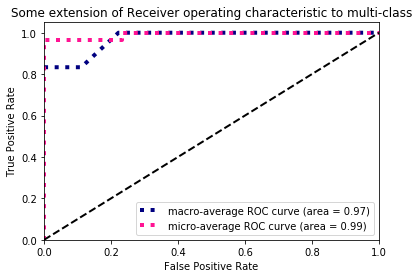

In [688]:
# ROC with 5 good features and one bad feature misses when feature is on

# make the target, which will be 10 'images' with 6 features, 

target = np.tile(np.array([1,1,1,0,0,0]),(9,1))
flipped = np.array([0,0,0,1,1,1]).reshape(1,-1)
target_positive_class=np.concatenate((target,flipped),axis=0)


# make the preds so that one feature is terrible and all the rest are nearly perfect
pred = np.array([.8,.8,.8,.2,.2,.2])
pred_matrix = np.tile(pred,(9,1))
flipped_p =  np.array([.2,.2,.2,.8,.8,.2]).reshape(1,-1)
preds_uniform = np.concatenate((pred_matrix,flipped_p),axis=0)
# Make the preds random
preds_uniform_rand = preds_uniform+np.random.normal(0,.05,10*6).reshape(10,6)

# preds_uniform_rand[0,5]=.95

grouped_roc(target_positive_class, preds_uniform_rand)
None

# Two features, low occurence is predicted poorly in all cases

[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]]
[[0.80834789 0.872583  ]
 [0.81026228 0.92047938]
 [0.71735454 0.98182419]
 [0.82970079 0.83711088]
 [0.77513102 0.87503628]
 [0.85392466 0.95517416]
 [0.80146683 0.9632847 ]
 [0.84360737 0.89398436]
 [0.7763347  0.87847876]
 [0.21952562 0.12064581]]


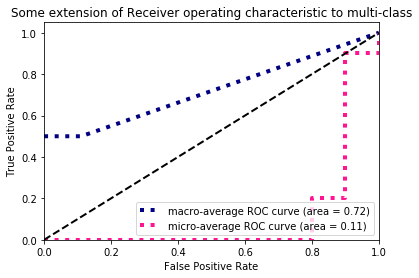

In [689]:
# ROC behavior with two features and low occurence is bad

# make the target, which will be 10 'images' with 6 features, 
target = np.tile(np.array([1,0]),(9,1))
flipped = np.array([0,1]).reshape(1,-1)
target_positive_class=np.concatenate((target,flipped),axis=0)


# make the preds so that one feature is terrible and all the rest are nearly perfect
pred = np.array([.8,.9])
pred_matrix = np.tile(pred,(9,1))
flipped_p =  np.array([.2,.1]).reshape(1,-1)
preds_uniform = np.concatenate((pred_matrix,flipped_p),axis=0)
# Make the preds random
preds_uniform_rand = preds_uniform+np.random.normal(0,.05,10*2).reshape(10,2)

grouped_roc(target_positive_class, preds_uniform_rand)
None

# underpredicted high occurence feature once

In [679]:
# 10 images bad at the high occurence feature once

# make the target, which will be 10 'images' with 6 features, 
target = np.tile(np.array([1,0]),(9,1))
flipped = np.array([0,1]).reshape(1,-1)
target_positive_class=np.concatenate((target,flipped),axis=0)


# make the preds so that one feature is terrible and all the rest are nearly perfect
pred = np.array([.8,.1])
pred_matrix = np.tile(pred,(9,1))
flipped_p =  np.array([.8,.1]).reshape(1,-1)
preds_uniform = np.concatenate((pred_matrix,flipped_p),axis=0)
# Make the preds random
preds_uniform_rand = preds_uniform+np.random.normal(0,.05,10*2).reshape(10,2)
image_target=np.array([0,1]).reshape(1,-1)
image_bad=np.array([.9,.1]).reshape(1,-1)
preds_uniform_rand[8,:]=np.array([.1,.1])
preds_uniform_rand[9,:]=np.array([.1,.9])


#add a bad image

# preds_uniform_rand = np.concatenate((preds_uniform_rand,image_bad),axis=0)
# target_positive_class = np.concatenate((target_positive_class,image_target),axis=0)

[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]]
[[0.77748156 0.03703428]
 [0.85503273 0.01856014]
 [0.89163179 0.15114001]
 [0.77620678 0.13379996]
 [0.78717179 0.08442913]
 [0.82632376 0.04365776]
 [0.78237838 0.14947394]
 [0.84485286 0.06613515]
 [0.1        0.1       ]
 [0.1        0.9       ]]


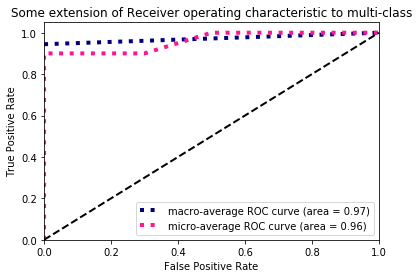

In [665]:
grouped_roc(target_positive_class, preds_uniform_rand)
None

In [668]:
# 10 images underpredicts at the low occurence feature when it is present

# make the target, which will be 10 'images' with 6 features, 
target = np.tile(np.array([1,0]),(9,1))
flipped = np.array([0,1]).reshape(1,-1)
target_positive_class=np.concatenate((target,flipped),axis=0)


# make the preds so that one feature is terrible and all the rest are nearly perfect
pred = np.array([.8,.1])
pred_matrix = np.tile(pred,(9,1))
flipped_p =  np.array([.8,.1]).reshape(1,-1)
preds_uniform = np.concatenate((pred_matrix,flipped_p),axis=0)
# Make the preds random
preds_uniform_rand = preds_uniform+np.random.normal(0,.05,10*2).reshape(10,2)
image_target=np.array([0,1]).reshape(1,-1)
image_bad=np.array([.9,.1]).reshape(1,-1)
preds_uniform_rand[8,:]=np.array([.9,.1])
preds_uniform_rand[9,:]=np.array([.1,.1])


#add a bad image

# preds_uniform_rand = np.concatenate((preds_uniform_rand,image_bad),axis=0)
# target_positive_class = np.concatenate((target_positive_class,image_target),axis=0)

[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]]
[[ 0.81343994  0.14653879]
 [ 0.84863677  0.09164434]
 [ 0.83462117  0.0775269 ]
 [ 0.89424081  0.10389975]
 [ 0.89230772  0.0740367 ]
 [ 0.79441881  0.13061499]
 [ 0.7291915  -0.03497031]
 [ 0.75146102  0.10201319]
 [ 0.9         0.1       ]
 [ 0.1         0.1       ]]


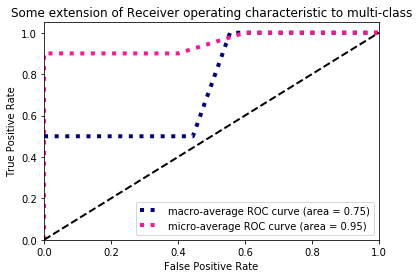

In [670]:
grouped_roc(target_positive_class, preds_uniform_rand)
plt.show()

In [671]:
# two high occurence features bad once on one

# make the target, which will be 10 'images' with 6 features, 
target = np.tile(np.array([1,1]),(9,1))
flipped = np.array([0,0]).reshape(1,-1)
target_positive_class=np.concatenate((target,flipped),axis=0)


# make the preds so that one feature is terrible and all the rest are nearly perfect
pred = np.array([.8,.9])
pred_matrix = np.tile(pred,(9,1))
flipped_p =  np.array([.2,.1]).reshape(1,-1)
preds_uniform = np.concatenate((pred_matrix,flipped_p),axis=0)
# Make the preds random
preds_uniform_rand = preds_uniform+np.random.normal(0,.05,10*2).reshape(10,2)

preds_uniform_rand[0,0]=.1

[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]]
[[0.1        0.88116815]
 [0.79757539 0.88341342]
 [0.88160656 0.92082504]
 [0.88921134 0.91003208]
 [0.77433548 0.90907896]
 [0.87293172 0.82738182]
 [0.81176686 0.96255245]
 [0.87769738 0.90809327]
 [0.81851045 0.91182742]
 [0.14958983 0.17050055]]


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fef6a7bceb8>)

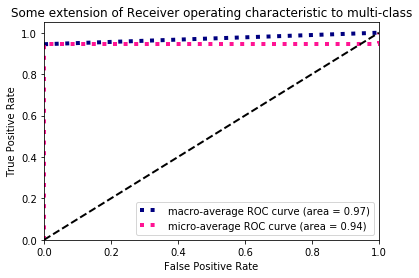

In [672]:
grouped_roc(target_positive_class, preds_uniform_rand)

In [673]:
# 10 images one bad image, meaning one bad prediction on all features

# make the target, which will be 10 'images' with 6 features, 
target = np.tile(np.array([0,1]),(9,1))
flipped = np.array([1,0]).reshape(1,-1)
target_positive_class=np.concatenate((target,flipped),axis=0)


# make the preds so that one feature is terrible and all the rest are nearly perfect
pred = np.array([.1,.8])
pred_matrix = np.tile(pred,(9,1))
flipped_p =  np.array([.1,.8]).reshape(1,-1)
preds_uniform = np.concatenate((pred_matrix,flipped_p),axis=0)

# Make the preds random
preds_uniform_rand = preds_uniform+np.random.normal(0,.05,10*2).reshape(10,2)
image_target=np.array([0,1]).reshape(1,-1)
image_bad=np.array([.9,.1]).reshape(1,-1)

[[0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]]
[[0.02437288 0.87273127]
 [0.06943839 0.80708896]
 [0.15922325 0.80724264]
 [0.02402894 0.88271597]
 [0.03978132 0.91749794]
 [0.13358363 0.84064213]
 [0.10234157 0.86080138]
 [0.07959419 0.69914204]
 [0.01511819 0.77500239]
 [0.10069439 0.81352638]]


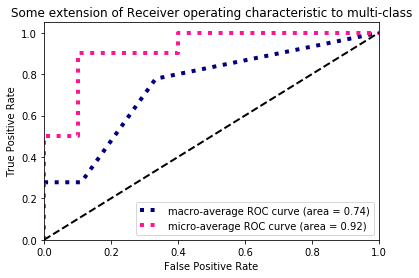

In [674]:
grouped_roc(target_positive_class, preds_uniform_rand)
plt.show()

In [675]:
# 2 images one bad feature
number_of_features=5
number_of_bad=1
number_of_good=number_of_features-number_of_bad
number_of_images=2

# make the target, which will be 10 'images' with 6 features, 
target = np.tile(np.append(np.ones(number_of_good),np.zeros(number_of_bad)),(number_of_images-1,1))
flipped = np.append(np.zeros(number_of_good),np.ones(number_of_bad)).reshape(1,-1)
target_positive_class=np.concatenate((target,flipped),axis=0)


# make the preds so that one feature is terrible and all the rest are nearly perfect
pred = np.ones(number_of_features)-.2
pred_matrix = np.tile(pred,(number_of_images-1,1))
flipped_p =  np.append(np.zeros(number_of_good)+.2, np.zeros(number_of_bad)+.2).reshape(1,-1)
preds_uniform = np.concatenate((pred_matrix,flipped_p),axis=0)

# add one bad feature
bad_feature=np.append(np.zeros(number_of_images-1),np.ones(1)).reshape(-1,number_of_bad)
target_positive_class = np.append(target_positive_class,bad_feature,axis=1)

# Add bad predictions
bad_preds=np.append(np.zeros(number_of_images-1)+.2,np.ones(1)-.2).reshape(-1,number_of_bad)
preds_uniform = np.append(preds_uniform,bad_preds,axis=1)


# Make the preds random
preds_uniform_rand = preds_uniform+np.random.normal(0,.05,(number_of_images*(number_of_features+1))).reshape(number_of_images, number_of_features+1)




[[1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1.]]
[[0.86059587 0.79426776 0.82216201 0.79274114 0.7592233  0.2423049 ]
 [0.27906998 0.21750266 0.16660864 0.24020982 0.22482302 0.79310586]]


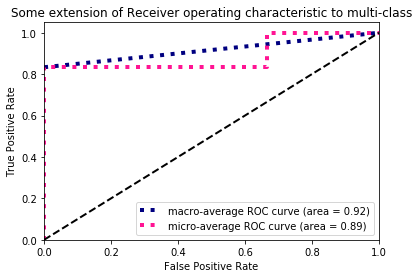

In [676]:
grouped_roc(target_positive_class, preds_uniform_rand)
plt.show()

In [650]:
# number_of_good_features
number_of_features=5
number_of_bad=1
number_of_good=number_of_features-number_of_bad
number_of_images=1000

# make the target, which will be 10 'images' with 6 features, 
target = np.tile(np.append(np.ones(number_of_good),np.zeros(number_of_bad)),(number_of_images-1,1))
flipped = np.append(np.zeros(number_of_good),np.ones(number_of_bad)).reshape(1,-1)
target_positive_class=np.concatenate((target,flipped),axis=0)


# make the preds so that one feature is terrible and all the rest are nearly perfect
pred = np.ones(number_of_features)-.2
pred_matrix = np.tile(pred,(number_of_images-1,1))
flipped_p =  np.append(np.zeros(number_of_good)+.2, np.zeros(number_of_bad)+.2).reshape(1,-1)
preds_uniform = np.concatenate((pred_matrix,flipped_p),axis=0)

# add one bad feature
bad_feature=np.append(np.zeros(number_of_images-1),np.ones(1)).reshape(-1,number_of_bad)
target_positive_class = np.append(target_positive_class,bad_feature,axis=1)

# Add bad predictions
bad_preds=np.append(np.zeros(number_of_images-1)+.2,np.ones(1)-.2).reshape(-1,number_of_bad)
preds_uniform = np.append(preds_uniform,bad_preds,axis=1)


# Make the preds random
preds_uniform_rand = preds_uniform+np.random.normal(0,.05,(number_of_images*(number_of_features+1))).reshape(number_of_images, number_of_features+1)




[[1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 0. 0.]
 ...
 [1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1.]]
[[0.71101591 0.7959727  0.78046414 0.81358313 0.80180395 0.22061685]
 [0.75281765 0.7598748  0.79991189 0.85221677 0.85802742 0.16501557]
 [0.79080321 0.81041709 0.83469756 0.86853556 0.83344992 0.28164668]
 ...
 [0.81962674 0.75197666 0.81210834 0.88627073 0.7766196  0.18424367]
 [0.75371721 0.85945509 0.81774728 0.70387449 0.67436604 0.16109304]
 [0.29155935 0.11707422 0.12223964 0.16332569 0.246505   0.77298087]]


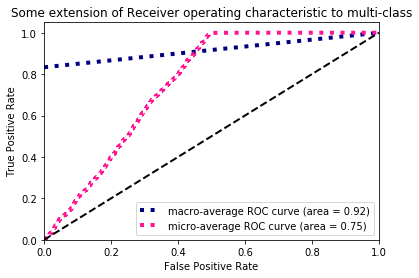

In [652]:
# 1000 images 1 good 5 bad 
grouped_roc(target_positive_class, preds_uniform_rand)
plt.show()

In [411]:
# number_of_good_features
number_of_features=1
number_of_bad=1
number_of_good=number_of_features-number_of_bad
number_of_images=1000

# make the target, which will be 10 'images' with 6 features, 
target = np.tile(np.append(np.ones(number_of_good),np.zeros(number_of_bad)),(number_of_images-1,1))
flipped = np.append(np.zeros(number_of_good),np.ones(number_of_bad)).reshape(1,-1)
target_positive_class=np.concatenate((target,flipped),axis=0)


# make the preds so that one feature is terrible and all the rest are nearly perfect
pred = np.ones(number_of_features)-.2
pred_matrix = np.tile(pred,(number_of_images-1,1))
flipped_p =  np.append(np.zeros(number_of_good)+.2, np.zeros(number_of_bad)+.2).reshape(1,-1)
preds_uniform = np.concatenate((pred_matrix,flipped_p),axis=0)

# add one bad feature
bad_feature=np.append(np.zeros(number_of_images-1),np.ones(1)).reshape(-1,number_of_bad)
target_positive_class = np.append(target_positive_class,bad_feature,axis=1)

# Add bad predictions
bad_preds=np.append(np.zeros(number_of_images-1)+.2,np.ones(1)-.2).reshape(-1,number_of_bad)
preds_uniform = np.append(preds_uniform,bad_preds,axis=1)


# Make the preds random
preds_uniform_rand = preds_uniform+np.random.normal(0,.05,(number_of_images*(number_of_features+1))).reshape(number_of_images, number_of_features+1)

In [415]:
print(preds_uniform.shape)

(1000, 2)


[0. 0. 0.]


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fef6c2079b0>)

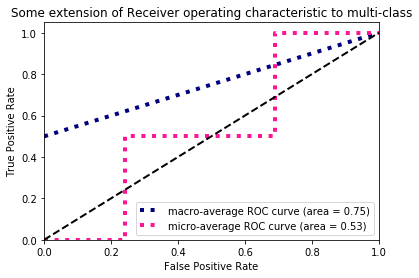

In [412]:
 grouped_roc(target_positive_class, preds_uniform_rand)

In [385]:
def grouped_roc(y_val, y_pred):
    """
    The macro average finds the ROC of every feature and then averages all the lines
    the micro roc flattens all the y_val and y_preds and makes one 
    ROC curve as if it was one image with x number of features
    """

    n_classes = y_val.shape[1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_pred[:, i], pos_label=1)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_val.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute the macro-average ROC curve and ROC area
    
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points and sum them all together
    mean_tpr = np.zeros_like(all_fpr)
    
    
    for i in range(n_classes):
        if not np.isnan(np.interp(all_fpr, fpr[i], tpr[i])).any():
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes
    print(mean_tpr)
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


    # plots
    lw = 2
    fig, ax = plt.subplots()
    ax.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)
    ax.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    
    return fig, ax

[0.5 0.5 1. ]


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fef6c5f4b38>)

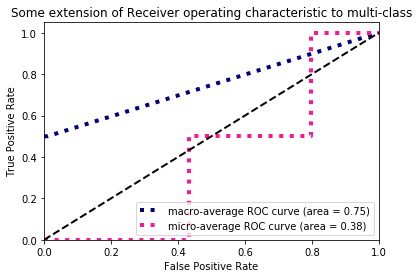

In [389]:
grouped_roc(target_positive_class, preds_uniform_rand)

In [390]:
def ROC_AUC_per_feature(i, target, predictions):
    fpr=dict()
    tpr=dict()
    roc_auc=dict()
    
    fpr[i], tpr[i], _ = roc_curve(target[:, i], predictions[:, i], pos_label=1)
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()

    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

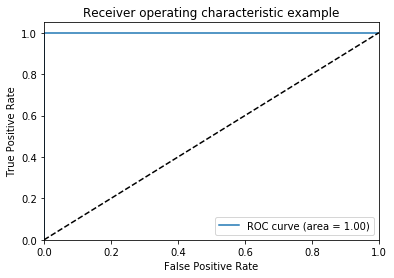

In [380]:
ROC_AUC_per_feature(1, target_positive_class, preds_uniform_rand)

/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/sklearn/metrics/ranking.py:113: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):


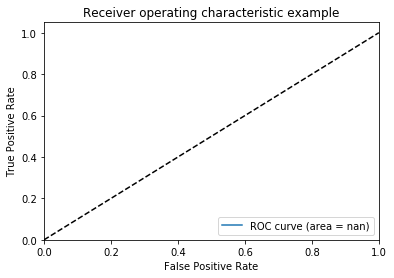

In [103]:
ROC_AUC_per_feature(0,target,preds)

In [96]:
preds=preds+np.random.normal(0,.05,10*6).reshape(10,6)

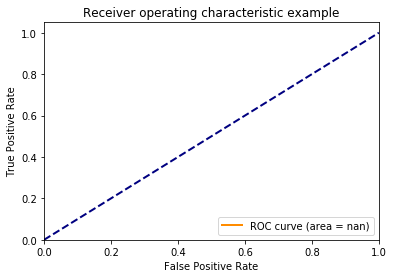

In [136]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [137]:
fpr[2]

array([nan, nan, nan])

In [145]:
true=np.array([[1,1,0],[1,1,0]])
pred=np.array([[1,0,1],[1,0,1]])

In [146]:
true_pos=np.logical_and(true,pred)

In [152]:
total=np.sum(true_pos)

In [153]:
true

array([[1, 1, 0],
       [1, 1, 0]])

In [154]:
pred

array([[1, 0, 1],
       [1, 0, 1]])

In [155]:
true_pos

array([[ True, False, False],
       [ True, False, False]])

In [160]:
pred /= .5

TypeError: ufunc 'true_divide' output (typecode 'd') could not be coerced to provided output parameter (typecode 'l') according to the casting rule ''same_kind''